In [1]:
# Import pandas, matplotlib, and numpy
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Import for splitting data into train & test for the ML models
from sklearn.model_selection import train_test_split

# Import Machine Learning Linear regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

# Import neural network modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Import standard scaler for scaling the data
from sklearn.preprocessing import StandardScaler

# Import metrics to calculate accuracy of models
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Read the cleaned country data CSV file
df = pd.read_csv("../Resources/merged_df.csv", encoding ="unicode_escape")
world_df = df.copy()
world_df.head()

,country_name,Year,urbanization,gdp_per_cap,inflation,gdp_current,unemployment,literacy_adult,health_exp,literacy_youth,life_exp,re_consumption,ff_consumption,energy_use
0,Canada,1971,76.090,4520.162878,2.704918,9.927196e+10,6.400000,81.228489,6.204456,88.205112,73.029268,30.497158,84.154154,6436.226256
1,Afghanistan,1971,12.021,166.224831,25.565204,1.831109e+09,8.118803,81.228489,6.204456,88.205112,37.923000,30.497158,65.539705,2326.432009
2,Albania,1971,31.933,10212.316586,25.565204,2.063322e+11,8.118803,81.228489,6.204456,88.205112,65.618000,30.497158,74.660703,785.161526
3,Algeria,1971,39.665,359.824582,2.626642,5.077222e+09,8.118803,81.228489,6.204456,88.205112,43.670000,30.497158,98.999816,245.527602
4,American Samoa,1971,70.784,10212.316586,25.565204,2.063322e+11,8.118803,81.228489,6.204456,88.205112,66.294149,30.497158,65.539705,2326.432009


### Random Forest Regressor model

In [6]:
# Setting features dataframe and target vector
X = world_df.drop(["gdp_current", "country_name", "gdp_per_cap"], axis=1)
y = world_df["gdp_current"]

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the random forest regressor model
rfr_model = RandomForestRegressor(n_estimators=1000, random_state=42)

# Fit the model
rfr_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [7]:
# Make predictions on the test data set
y_pred = rfr_model.predict(X_test)

print("Model's Performance on Testing Data (20% of all data).\n")
print("Evaluation metrics of World's Data (1971-2021)")
print("====================")
# Calculate the accuracy of the RFR model
score = rfr_model.score(X_test, y_test)
print(f"Test accuracy: {np.round(score * 100, 2)}%")

# Calculate the r2_score of RFR model
r2_score_ = r2_score(y_test,y_pred)
print(f"R2 Score: {np.round(r2_score_ * 100, 2)}%")

Model's Performance on Testing Data (20% of all data).

Evaluation metrics of World's Data (1971-2021)
Test accuracy: 82.56%
R2 Score: 82.56%


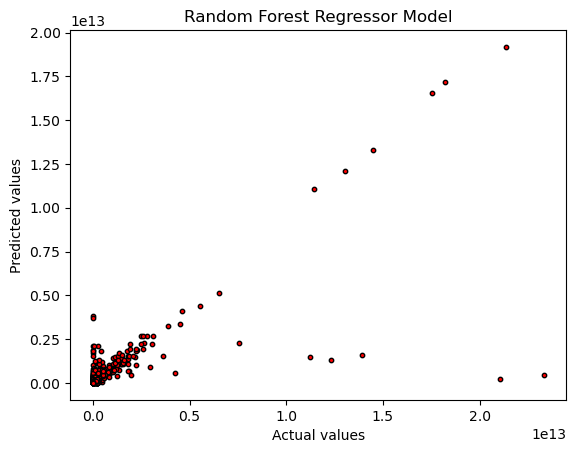

In [5]:
plt.scatter(y_test,y_pred, s=10, c='red', edgecolor='black',)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest Regressor Model')
plt.show()

In [28]:
y_pred_df = pd.DataFrame(y_pred, y_test.values)

data = {"GDP_pred": y_pred,
        "GDP_actual": y_test.values} 

data_df = pd.DataFrame(data)
data_df

,GDP_pred,GDP_actual
0,3.049525e+11,1.778824e+11
1,1.869658e+11,2.063322e+11
2,1.661014e+11,4.274250e+08
3,2.061265e+11,2.063322e+11
4,1.858476e+11,2.063322e+11
...,...,...
2209,1.765906e+11,6.040638e+10
2210,1.894893e+11,2.612536e+11
2211,1.288543e+11,8.982048e+09
2212,2.534000e+11,2.579161e+11


In [ ]:
# Set the bar width
bar_width = 0.35

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the bars
ax.bar(x, y1, bar_width, label='GDP_predicted')
ax.bar(x + bar_width, y2, bar_width, label='Variable 2')

# Add labels and a legend
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Title')
ax.legend()

# Show the plot
plt.show()


In [12]:
# Make predictions on the training data - to check if there's overfitting
y_pred = rfr_model.predict(X_train)

print("Model's Performance on Training Data (80% of all data).\n")
print("Evaluation metrics of World's Data (1971-2021)")
print("====================")
# Calculate the accuracy of the RFR model
score = rfr_model.score(X_train, y_train)
print(f"Test accuracy: {np.round(score * 100, 2)}%")

# Calculate the r2_score of RFR model
r2_score_ = r2_score(y_train,y_pred)
print(f"R2 Score: {np.round(r2_score_ * 100, 2)}%")

Model's Performance on Training Data (80% of all data).

Evaluation metrics of World's Data (1971-2021)
Test accuracy: 95.12%
R2 Score: 95.12%


### Random Forest Regressor model + Scaled

In [17]:
# Setting features dataframe and target vector
X = world_df.drop(["gdp_current", "country_name", "Year", "gdp_per_cap"], axis=1)
y = world_df["gdp_current"]

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the X_train data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the X_test data using scaler object
X_test_scaled = scaler.transform(X_test)

# Create the random forest regressor model
rfr_model = RandomForestRegressor(n_estimators=1000, random_state=42)

# Fit the model
rfr_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [18]:
# Make predictions on the test data set
y_pred_train = rfr_model.predict(X_train_scaled)

# Calculate the r2_score
r2_score_ = r2_score(y_train, y_pred_train)
print("Evaluation of RFR model on training data:")
print(f"R2 Score: {np.round(r2_score_ * 100, 2)}%")

Evaluation of RFR model on training data:
R2 Score: 95.06%


In [19]:
# Make predictions on the test data set
y_pred_test = rfr_model.predict(X_test_scaled)

print("Evaluation of RFR model on testing data:")
# Calculate the accuracy of the model
score = rfr_model.score(X_test_scaled, y_test)
print(f"Test accuracy: {np.round(score * 100, 2)}%")

# Calculate the r2_score
r2_score_ = r2_score(y_test,y_pred_test)
print(f"R2 Score: {np.round(r2_score_ * 100, 2)}%")

Evaluation of RFR model on testing data:
Test accuracy: 65.5%
R2 Score: 65.5%
